In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.rand(len(x_data))

In [0]:
y_true = (0.5*x_data) + 5 + noise

In [0]:
x_df = pd.DataFrame(data=x_data, columns=['X_Data'])
y_df = pd.DataFrame(data=y_true, columns=['Y'])
my_data = pd.concat([x_df,y_df],axis = 1)

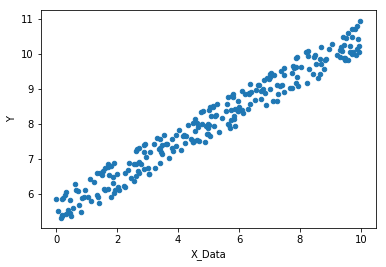

In [0]:
my_data.sample(n=250).plot(kind = 'scatter', x='X_Data', y='Y')

In [0]:
batch_size = 8
m = tf.Variable(0.5)
b = tf.Variable(1.0)

xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [0]:
y_model = m*xph + b
error = tf.reduce_sum(tf.square(yph-y_model))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  
  batches = 1000
  
  for i in range(batches):
    rand_ind = np.random.randint(len(x_data),size=batch_size)
    feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
    sess.run(train,feed_dict=feed)
  model_m, model_b = sess.run([m,b])

In [0]:
y_hat = model_m*x_data + model_b

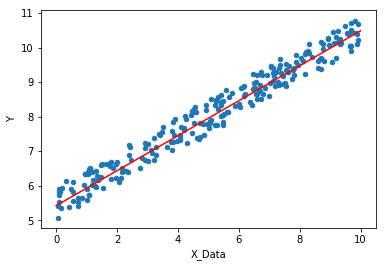

In [0]:
my_data.sample(n=250).plot(kind = 'scatter', x = 'X_Data', y = 'Y')
plt.plot(x_data,y_hat,'r')

In [0]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [44]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

W0727 20:25:09.375763 140650851764096 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpy3xq6qho


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=0)

In [0]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train,batch_size=4,num_epochs=None, shuffle=True)

In [0]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000, shuffle=False)

In [0]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000, shuffle=False)

In [54]:
estimator.train(input_fn=input_func,steps=1000)